___
# Exploration to create a GAN for Generating MNIST Handwritten Digits




### Test

In [3]:
# import data 
from keras.datasets.mnist import load_data

# load mnist img in memory 
(train_X, train_y), (test_X, test_y) = load_data()

# check the shape 
print('Tain : ', train_X.shape, train_y.shape)
print('Test : ', test_X.shape, test_y.shape)

Tain :  (60000, 28, 28) (60000,)
Test :  (10000, 28, 28) (10000,)


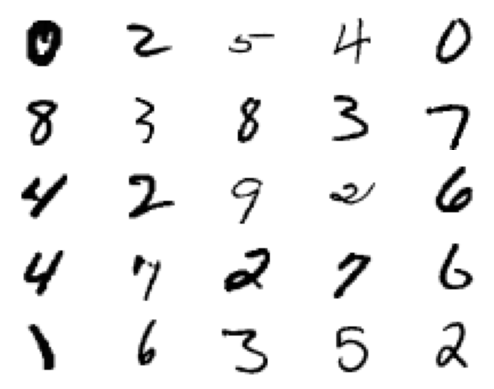

In [18]:
import matplotlib.pyplot as plt
import random

random_img = random.sample(range(0, 59999), 25)

for i, num in enumerate(random_img):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(train_X[num], cmap='gray_r')
plt.show()

## All imports here 

In [18]:
# import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Conv2D, Flatten, Dropout, Conv2DTranspose, Reshape
from tensorflow.keras.optimizers import Adam

# import to load the mnist dataset
from keras.datasets.mnist import load_data

# import to plot the sum of the moddel more clearly
from keras.utils.vis_utils import plot_model

# classic import 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


## The Discriminator Model

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          36928     
                                                                 
 leaky_re_lu_16 (LeakyReLU)  (None, 7, 7, 64)          0         
                                                                 
 dropout_13 (Dropout)        (None, 7, 7, 64)          0         
                                                                 
 flatten_6 (Flatten)         (None, 3136)             

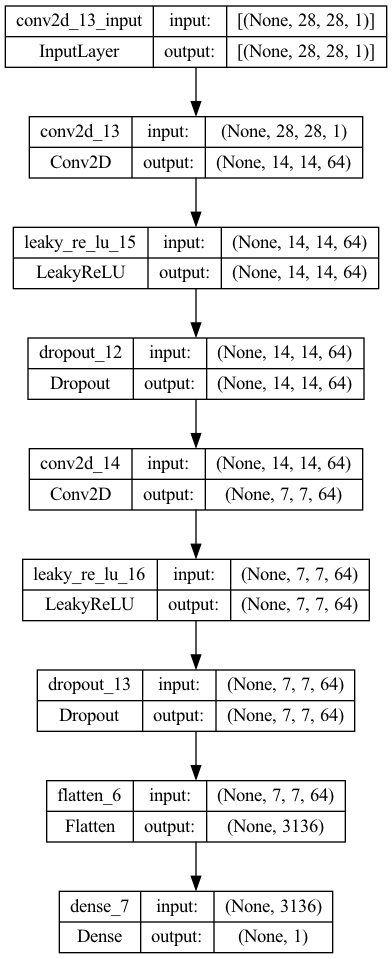

In [21]:
# define the standalone discriminator model
def discriminator(in_shape=(28,28,1)):
	model = Sequential()

    # input layer
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4)) # drop 40%

    # hidden layer
	model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Dropout(0.4)) # drop 40%

    # flat for the output
	model.add(Flatten())

    # output layer
	model.add(Dense(1, activation='sigmoid'))

	# compile model with homemade optimizer
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

	return model

# init model
model = discriminator()

# summarize the model
model.summary()

# plot the model
plot_model(model, to_file='../data/discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
# load and prepare mnist training images
def load_real_samples():
    # load mnist dataset
    (train_X, _), (_, _) = load_data() # only need a train X, don't use _
    
    # expand to 3d, e.g. add channels dimension
    X = np.expand_dims(train_X, axis=-1)
    
    # convert from unsigned ints to floats
    X = X.astype('float32')
    
    # scale from [0,255] to [0,1]
    X = X / 255.0
    
    return X

In [11]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = np.random.randint(0, dataset.shape[0], n_samples)

	# retrieve selected images
	X = dataset[ix]

	# generate 'real' class labels (1)
	y = np.ones((n_samples, 1))

	return X, y

In [12]:
def generate_fake_samples(n_samples):
    # generate uniform random numbers in [0,1]
    X = np.random.rand(28 * 28 * n_samples)
    
    # reshape into a batch of grayscale images
    X = X.reshape((n_samples, 28, 28, 1))
    
    # generate 'fake' class labels (0)
    y = np.zeros((n_samples, 1))
    
    return X, y

In [13]:
# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
	half_batch = int(n_batch / 2)

	# manually enumerate epochs
	for i in range(n_iter):
		# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)

		# update discriminator on real samples
		_, real_acc = model.train_on_batch(X_real, y_real)

		# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(half_batch)

		# update discriminator on fake samples
		_, fake_acc = model.train_on_batch(X_fake, y_fake)

		# print performance
		print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [15]:
# init the modelm
discriminator_model = discriminator()

# load real image from the dataset
data = load_real_samples()

# fit & train the model 
train_discriminator(discriminator_model, data)

>1 real=34% fake=14%
>2 real=35% fake=23%
>3 real=42% fake=49%
>4 real=44% fake=60%
>5 real=38% fake=75%
>6 real=45% fake=92%
>7 real=38% fake=95%
>8 real=48% fake=98%
>9 real=40% fake=98%
>10 real=52% fake=100%
>11 real=46% fake=100%
>12 real=47% fake=100%
>13 real=66% fake=100%
>14 real=57% fake=100%
>15 real=55% fake=100%
>16 real=58% fake=100%
>17 real=61% fake=100%
>18 real=64% fake=100%
>19 real=56% fake=100%
>20 real=66% fake=100%
>21 real=63% fake=100%
>22 real=65% fake=100%
>23 real=76% fake=100%
>24 real=70% fake=100%
>25 real=81% fake=100%
>26 real=81% fake=100%
>27 real=87% fake=100%
>28 real=88% fake=100%
>29 real=94% fake=100%
>30 real=94% fake=100%
>31 real=92% fake=100%
>32 real=95% fake=100%
>33 real=99% fake=100%
>34 real=99% fake=100%
>35 real=97% fake=100%
>36 real=98% fake=100%
>37 real=99% fake=100%
>38 real=100% fake=100%
>39 real=99% fake=100%
>40 real=100% fake=100%
>41 real=99% fake=100%
>42 real=100% fake=100%
>43 real=100% fake=100%
>44 real=100% fake=100%
>

## The Generator Model

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 14, 14, 128)      262272    
 ranspose)                                                       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 28, 28, 128)      262272    
 ranspose)                                            

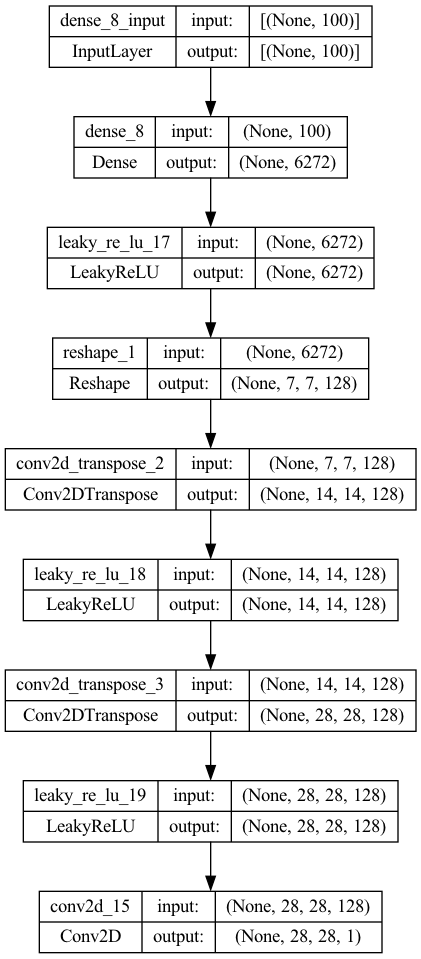

In [22]:

# define the standalone generator model
def generator(latent_dim):
	model = Sequential()

	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))

	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))

	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))

	return model

# define the size of the latent space
latent_dim = 100

# define the generator model
model = generator(latent_dim)

# summarize the model
model.summary()
# plot the model
plot_model(model, to_file='../data/generator_plot.png', show_shapes=True, show_layer_names=True)

In [27]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    
	# generate points in the latent space
	X_input = np.random.randn(latent_dim * n_samples)

	# reshape into a batch of inputs for the network
	X_input = X_input.reshape(n_samples, latent_dim)

	return X_input

In [25]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)

	# predict outputs
	X = g_model.predict(x_input)

	# create 'fake' class labels (0)
	y = np.zeros((n_samples, 1))

	return X, y

1/1 [==============================] - 0s 137ms/step


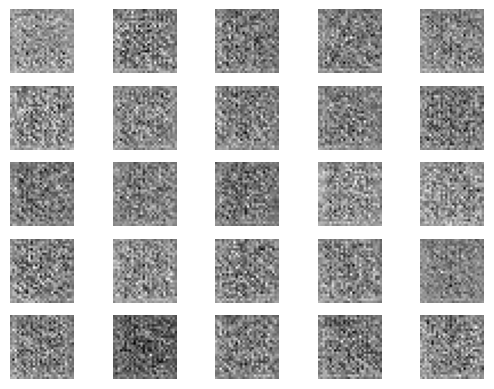

In [28]:
# size of the latent space
latent_dim = 100
# define the discriminator model
g_model = generator(latent_dim)
# generate samples
n_samples = 25

X, _ = generate_fake_samples(g_model, latent_dim, n_samples)

# plot the generated samples
for i in range(n_samples):
    # define subplot
    plt.subplot(5, 5, 1 + i)
    # turn off axis labels
    plt.axis('off')
    # plot single image
    plt.imshow(X[i, :, :, 0], cmap='gray_r')
    
# show the figure
plt.show()

## The Gan

In [42]:
# define the combined generator and discriminator model, for updating the generator
def model_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False

	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)

	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)

	return model

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_19 (Sequential)  (None, 28, 28, 1)         1164289   
                                                                 
 sequential_18 (Sequential)  (None, 1)                 40705     
                                                                 
Total params: 1,204,994
Trainable params: 1,164,289
Non-trainable params: 40,705
_________________________________________________________________


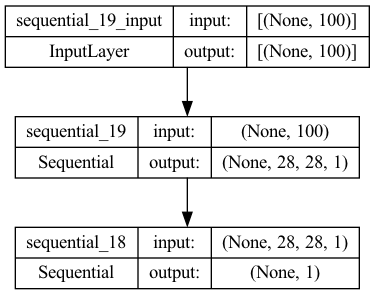

In [43]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = discriminator()
# create the generator
g_model = generator(latent_dim)
# create the gan
gan_model = model_gan(g_model, d_model)

# summarize gan model
gan_model.summary()

# plot gan model
plot_model(gan_model, to_file='../data/gan_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = np.ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [33]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)

	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = np.ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)

			# print loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

In [39]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, epoch, n=10):
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	plt.savefig(filename)
	plt.close()

In [40]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(x_fake, epoch)
	# save the generator model tile file
	filename = 'generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [37]:
# train the generator and discriminator
def train_gan(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # generate 'fake' examples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # create training set for the discriminator
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            # update discriminator model weights
            d_loss, _ = d_model.train_on_batch(X, y)
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
            # evaluate the model performance, sometimes
            if (i+1) % 10 == 0:
                summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [44]:
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = discriminator()
# create the generator
g_model = generator(latent_dim)
# create the gan
gan = model_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train_gan(g_model, d_model, gan, dataset, latent_dim)

4/4 [==============================] - 0s 93ms/step
>1, 1/234, d=0.689, g=0.708
4/4 [==============================] - 1s 146ms/step
>1, 2/234, d=0.682, g=0.723
4/4 [==============================] - 0s 136ms/step
>1, 3/234, d=0.679, g=0.740
4/4 [==============================] - 0s 133ms/step
>1, 4/234, d=0.673, g=0.748
4/4 [==============================] - 0s 130ms/step
>1, 5/234, d=0.667, g=0.758
4/4 [==============================] - 0s 125ms/step
>1, 6/234, d=0.661, g=0.773
4/4 [==============================] - 1s 138ms/step
>1, 7/234, d=0.654, g=0.786
4/4 [==============================] - 0s 135ms/step
>1, 8/234, d=0.654, g=0.793
4/4 [==============================] - 0s 124ms/step
>1, 9/234, d=0.645, g=0.797
4/4 [==============================] - 1s 136ms/step
>1, 10/234, d=0.646, g=0.799
4/4 [==============================] - 0s 137ms/step
>1, 11/234, d=0.645, g=0.796
4/4 [==============================] - 0s 137ms/step
>1, 12/234, d=0.644, g=0.781
4/4 [=====================